<a href="https://colab.research.google.com/github/Rodrigo-Lopes-de-Andrade/Artigos_e_Projetos/blob/main/Analise_da_Qualidade_de_Agua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Visão Geral
    - 1.1 Importando bibliotecas python e nosso conjunto de dados
    - 1.2 Completude dos dados
    - 1.3 Distribuição de dados
2. Análise exploratória de dados
    - 2.1 Análise univariada
    - 2.2 Análise multivariada
3. Pré-processamento de dados
    - 3.1 Preenchimento de dados ausentes
    - 3.2 Lidando com valores discrepantes
    - 3.3 Dimensionamento de recursos
    - 3.4 Seleção de recursos
4. Modelagem
    - 4.1 Nossos modelos de linha de base
    - 4.2 Parâmetros de hiperajuste

# Contexto
Fonte: https://www.kaggle.com/adityakadiwal/water-potability

O acesso à água potável é essencial para a saúde, um direito humano básico e um componente de uma política efetiva de proteção à saúde. Isto é importante como uma questão de saúde e desenvolvimento a nível nacional, regional e local. Em algumas regiões, foi demonstrado que os investimentos em abastecimento de água e saneamento podem gerar um benefício econômico líquido, uma vez que as reduções nos efeitos adversos à saúde e nos custos de saúde superam os custos de realização das intervenções.

# O Dataset
O arquivo water_potability.csv contém métricas de qualidade da água para 3.276 corpos d'água diferentes.

# Data dictionary
    1. pH value:
    O pH é um parâmetro importante na avaliação do equilíbrio ácido-base da água. É também o indicador da condição ácida ou alcalina do estado da água. A OMS recomendou o limite máximo permitido de pH de 6,5 a 8,5. Os intervalos de investigação atuais foram de 6,52 a 6,83, que estão na faixa dos padrões da OMS.

    2. Hardness:
    A dureza é causada principalmente por sais de cálcio e magnésio. Esses sais são dissolvidos a partir de depósitos geológicos através dos quais a água viaja. O período de tempo em que a água está em contato com o material produtor de dureza ajuda a determinar quanta dureza existe na água bruta. A dureza foi originalmente definida como a capacidade da água de precipitar sabão causada por cálcio e magnésio.

    3. Solids (Total dissolved solids - TDS):
    A água tem a capacidade de dissolver uma ampla gama de minerais ou sais inorgânicos e alguns orgânicos, como potássio, cálcio, sódio, bicarbonatos, cloretos, magnésio, sulfatos, etc. Esses minerais produziram sabor indesejado e cor diluída na aparência da água. Este é o parâmetro importante para o uso da água. A água com alto valor de TDS indica que a água é altamente mineralizada. O limite desejável para TDS é de 500 mg/le o limite máximo é de 1000 mg/l prescrito para beber.

    4. Chloramines:
    Cloro e cloramina são os principais desinfetantes usados ​​em sistemas públicos de água. As cloraminas são mais comumente formadas quando a amônia é adicionada ao cloro para tratar a água potável. Níveis de cloro de até 4 miligramas por litro (mg/L ou 4 partes por milhão (ppm)) são considerados seguros na água potável.

    5. Sulfate:
    Os sulfatos são substâncias naturais encontradas em minerais, solo e rochas. Eles estão presentes no ar ambiente, águas subterrâneas, plantas e alimentos. O principal uso comercial do sulfato é na indústria química. A concentração de sulfato na água do mar é de cerca de 2.700 miligramas por litro (mg/L). Varia de 3 a 30 mg/L na maioria dos suprimentos de água doce, embora concentrações muito mais altas (1000 mg/L) sejam encontradas em algumas localizações geográficas.

    6. Conductivity:
    A água pura não é um bom condutor de corrente elétrica, mas um bom isolante. O aumento da concentração de íons aumenta a condutividade elétrica da água. Geralmente, a quantidade de sólidos dissolvidos na água determina a condutividade elétrica. A condutividade elétrica (EC) realmente mede o processo iônico de uma solução que lhe permite transmitir corrente. De acordo com os padrões da OMS, o valor EC não deve exceder 400 μS/cm.

    7. Organic_carbon:
    O Carbono Orgânico Total (COT) nas águas de nascente vem de matéria orgânica natural em decomposição (NOM), bem como de fontes sintéticas. TOC é uma medida da quantidade total de carbono em compostos orgânicos em água pura. De acordo com a US EPA < 2 mg/L como TOC em água tratada/potável, e < 4 mg/Lit em água de fonte que é usada para tratamento.

    8. Trihalomethanes:
    THMs são produtos químicos que podem ser encontrados em água tratada com cloro. A concentração de THMs na água potável varia de acordo com o nível de matéria orgânica na água, a quantidade necessária para tratar a água e a temperatura da água está sendo tratada. Níveis de THM de são considerados seguros na água potável ppm.

    9. Turbidity:
    A turbidez da água depende da quantidade de matéria sólida presente no estado suspenso. É uma medida das propriedades de emissão de luz da água e o teste é usado para indicar a qualidade da descarga de resíduos em relação à matéria coloidal. O valor médio de turbidez obtido para o Wondo Genet Campus (0,98 NTU) é inferior ao valor recomendado pela OMS de 5,00 NTU.

    10. Potability:
    Indica se a água é segura para consumo humano onde 1 significa Potável e 0 significa Não potável.

# 1. Overview

## 1.1 Importing python libraries and our dataset

In [1]:
# General tools
import pandas as pd
import numpy as np
import os, math
from collections import Counter

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
morancolor=sns.color_palette(['#6a2202', '#bc7201', '#e5ab09', '#22180d', '#0f1a26','#241c24', '#745656', '#c7b44f', '#977f48', '#392c23'])
plt.style.use("fivethirtyeight")
sns.set_palette(morancolor)

plt.rcParams['font.family']='serif'
plt.rcParams['figure.dpi'] =100 # high resolution

# Manage warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/content/water_potability.csv")
df.dropna(how='all',inplace=True)
df.drop_duplicates(inplace=True)
df.shape

(3276, 10)

In [3]:
df.sample(3)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
168,NaN,205.509457,20406.927672,6.810069,355.265923,482.330055,12.337776,70.580607,4.102529,0
556,9.049166,169.509254,4343.356611,5.780823,386.700463,471.925377,16.170628,62.722085,2.814001,0
415,7.350379,193.633367,26736.085567,10.416589,309.416883,557.495685,16.519722,61.077383,3.663922,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 281.5 KB


- Nossa amostra contém 3276 observações e 10 recursos, incluindo nossa variável de destino - potabilidade
- Todos os recursos são numéricos


In [5]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

## 1.2 Data completeness

In [8]:
pd.DataFrame([df.isnull().sum().sort_values(ascending=False),(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)],
            index=['Valores ausentes','Percentagem']).T.

,Valores ausentes,Percentagem
Sulfate,781.0,0.238400
ph,491.0,0.149878
Trihalomethanes,162.0,0.049451
Potability,0.0,0.000000
Turbidity,0.0,0.000000
Organic_carbon,0.0,0.000000
Conductivity,0.0,0.000000
Chloramines,0.0,0.000000
Solids,0.0,0.000000
Hardness,0.0,0.000000


- Recursos contém dados ausentes: sulfato, ph e trihalometanos

## 1.3 Data distribution

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


- Target variable - Potability: 39% of our observations are safe for human consumption
- Features may contain outliers: solids, conductivity, and trihalomethanes

# 2. Exploratory data analysis

In [11]:
def despine():
    sns.despine(top=1,bottom=1,right=1,left=1)
    
def title(title,fontsize=13):
    plt.title(title,fontweight='bold',fontsize=fontsize)

In [12]:
def countall(df,lst,h=4,w=10,cut=3,hspace=.5,wspace=.25,annotsize=10):
    f=plt.figure(figsize=(w,h))
    plt.subplots_adjust(hspace=hspace,wspace=wspace)
    for i,col in enumerate(lst):
        ax=f.add_subplot(math.ceil(len(lst)/cut),cut,i+1)
        sns.countplot(df[col])
        for p in ax.patches:
            ax.annotate(f"{p.get_height()/df[col].shape[0]*100:.2f}%",xy=[p.get_x(),p.get_height()],fontsize=annotsize)
        despine()
        plt.ylabel('')
        plt.xlabel(col,fontweight='bold')

In [13]:
from scipy.stats import skew
def kdeall(df,lst,h=4,w=10,cut=3,hspace=.5,wspace=.25,meanskew=True,kdecut=0,legendsize=10,xlabelsize=13,loc='best'):
    f=plt.figure(figsize=(w,h))
    plt.subplots_adjust(hspace=hspace,wspace=wspace)
    for i,col in enumerate(lst):
        f.add_subplot(math.ceil(len(lst)/cut),cut,i+1)
        if meanskew==True:
            sns.kdeplot(df.dropna(subset=[col])[col],cut=kdecut,label=f'Skewness: {skew(df.dropna(subset=[col])[col]):.2f}',lw=3)
            plt.axvline(df.dropna(subset=[col])[col].mean(),label='mean',color='#22180d',lw=1.5)
            plt.axvline(df.dropna(subset=[col])[col].median(),label='median',ls='--',color='#22180d',lw=1.5)
            plt.legend(fontsize=legendsize,loc=loc)
        else: sns.kdeplot(df.dropna(subset=[col])[col],cut=kdecut,lw=3)
        sns.rugplot(df.dropna(subset=[col])[col])
        despine()
        plt.ylabel('')
        plt.xlabel(col,fontweight='bold',fontsize=xlabelsize)

In [ ]:
def kde2(df,lst,target,h=4,w=10,cut=3,hspace=.5,wspace=.25,xlabel=12):
    f=plt.figure(figsize=(w,h))
    plt.subplots_adjust(hspace=hspace,wspace=wspace)
    for i,col in enumerate(lst):
        ax=f.add_subplot(math.ceil(len(lst)/cut),cut,i+1)
        sns.kdeplot(data=df.dropna(subset=[col,target]),x=col,hue=target,cut=0)
        sns.rugplot(data=df.dropna(subset=[col,target]),x=col,hue=target)
        despine()
        plt.ylabel('')
        plt.xlabel(col,fontweight='bold',fontsize=xlabel)

In [14]:
def pointall(df,lst,target,h=4,w=10,cut=3,hspace=.5,wspace=.25,annotsize=10,choose=1):
    f=plt.figure(figsize=(w,h))
    plt.subplots_adjust(hspace=hspace,wspace=wspace)
    for i,col in enumerate(lst):
        ax=f.add_subplot(math.ceil(len(lst)/cut),cut,i+1)
        if choose==1: sns.pointplot(x=df[target],y=df[col],lw=3)
        else: sns.pointplot(x=df[col],y=df[target],lw=3)
        despine()
        plt.ylabel('')
        plt.xlabel(col,fontweight='bold')

In [ ]:
def barplot(df,lst,target,w=16,h=6,cut=3,hspace=.5,wspace=.25,color=None):
    f=plt.figure(figsize=(w,h))
    f.subplots_adjust(hspace=hspace,wspace=wspace)
    for i,col in enumerate(lst):
        f.add_subplot(math.ceil(len(lst)/cut),cut,i+1)
        sns.barplot(x=df[col],y=df[target],color=color)
        plt.xlabel(col,fontweight='bold')
        sns.despine(left=1,bottom=1,right=1,top=1)

In [ ]:
def kdeplot(df,lst,target,w=16,h=5.5,cut=3,hspace=.5,wspace=.25,yscale='linear'):
    f=plt.figure(figsize=(w,h))
    f.subplots_adjust(hspace=hspace,wspace=wspace)
    for i,col in enumerate(lst):
        f.add_subplot(math.ceil(len(lst)/cut),cut,i+1)
        data=df.dropna(subset=[col,target],how='any')
        sns.kdeplot(data[col],cut=0,color="#eacc97",multiple='stack')
        sns.kdeplot(data[col],hue=data[target],cut=0)
        plt.yscale(yscale)
        plt.xlabel(col,fontweight='bold')
        sns.despine(left=1,bottom=1,right=1,top=1)

In [ ]:
def stackedbar(train,x,y,h=2.5,w=7):
    sub=pd.crosstab(train[x],train[y])
    sub.div(sub.sum(1),0).plot(kind='bar',stacked=True,figsize=(w,h))
    plt.legend(loc='upper right',bbox_to_anchor=(1.22,1.03))
    plt.xticks(rotation=0)

In [ ]:
def violinplot(combine,y,x,target,h=3.5,w=10,scale='count',fontsize=15,title=None):
    plt.figure(figsize=(w,h))
    sns.violinplot(data=combine,x=x,y=y,hue=target,cut=0,split=True,scale=scale)
    sns.despine(top=1,bottom=1,right=1,left=1)
    if title==None: plt.title(f'{y} distribution by {x}',fontweight='bold',fontsize=fontsize)
    else: plt.title(title,fontweight='bold',fontsize=fontsize)
    plt.hlines([0,10],xmin=-1,xmax=3,ls='--') # children under 10 yrs
    plt.show()

In [15]:
def histall(df,lst,target,h=4,w=10,cut=3,hspace=.5,wspace=.25,xlabel=12):
    f=plt.figure(figsize=(w,h))
    plt.subplots_adjust(hspace=hspace,wspace=wspace)
    for i,col in enumerate(lst):
        ax=f.add_subplot(math.ceil(len(lst)/cut),cut,i+1)
        sns.histplot(data=df.dropna(subset=[col,target]),x=col,hue=target)
        despine()
        plt.ylabel('')
        plt.xlabel(col,fontweight='bold',fontsize=xlabel)

In [16]:
def boxall(df,lst,h=4,w=10,cut=3,hspace=.5,wspace=.25,annotsize=10,target=None):
    f=plt.figure(figsize=(w,h))
    plt.subplots_adjust(hspace=hspace,wspace=wspace)
    for i,col in enumerate(lst):
        ax=f.add_subplot(math.ceil(len(lst)/cut),cut,i+1)
        if target==None: sns.boxplot(df[col])
        else: sns.boxplot(df[target],df[col])
        despine()
        plt.ylabel('')
        plt.xlabel(col,fontweight='bold')

In [ ]:
def boxall2(df,lst,hspace=.5,wspace=.25,cut=3,h=7,w=10,target=None):
    f=plt.figure(figsize=(w,h))
    for i,col in enumerate(lst):
        f.add_subplot(math.ceil(len(lst)/cut),cut,i+1)
        if target==None: sns.boxplot(y=df[col],showmeans=True)
        else: sns.boxplot(x=df[target],y=df[col],showmeans=True)
        plt.ylabel('')
        plt.xlabel(col,fontweight='bold')
        sns.despine(top=1,bottom=1,left=1,right=1)
    plt.subplots_adjust(hspace=hspace,wspace=wspace)

In [17]:
def kdesmall(x):
    sns.kdeplot(df[x],hue=df.Potability,lw=3,cut=0)
    title(f'Distribution of {x}')

## 2.1 Univariate analysis

### 2.1.1 Our target variable: Potability

In [18]:
df.Potability.value_counts(1)

0    0.60989
1    0.39011
Name: Potability, dtype: float64

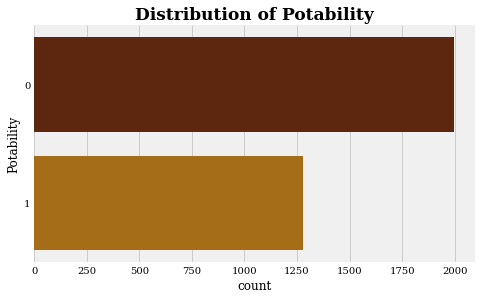

In [19]:
sns.catplot(data=df,y="Potability",kind='count',height=4,aspect=1.7)
despine()
title('Distribution of Potability',fontsize=17)

- Our target variable is not really well-balanced with about 61% of the water unusable for human consumptions

### 2.1.2 Distribution of our independent features

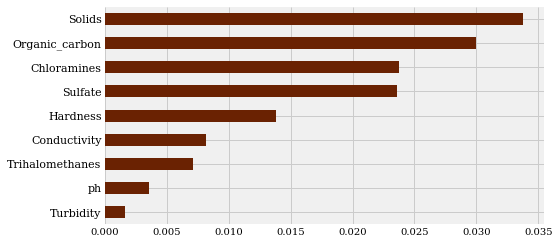

In [20]:
df.corr().Potability.abs().sort_values(ascending=False)[1:][::-1].plot(kind='barh',figsize=(7,4))
plt.yticks(fontsize=11)
despine()

- The most important features (in order) are probably: solids, organic carbon, chloramines, and sulfate

In [21]:
col=df.corr().Potability.abs().sort_values(ascending=False)[1:].index.tolist()
col

['Solids',
 'Organic_carbon',
 'Chloramines',
 'Sulfate',
 'Hardness',
 'Conductivity',
 'Trihalomethanes',
 'ph',
 'Turbidity']

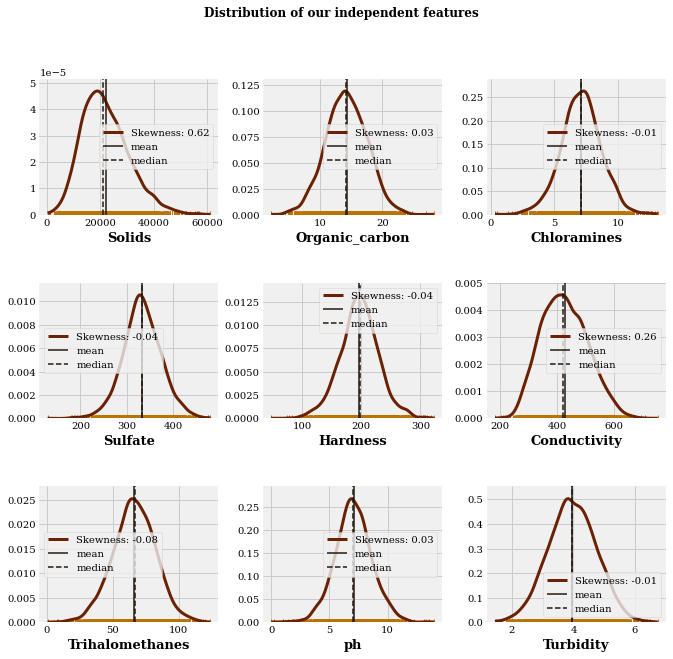

In [22]:
kdeall(df,col,cut=3,h=10,w=10,legendsize=10)
plt.suptitle('Distribution of our independent features',fontweight='bold')
plt.show()

- All of our independent features are almost normally distributed with small skewness (we should standardize them later), except for Solids
- Some large values appear in the right of Solids distribution (with the skewness of 0.62)

### 2.1.3 Our target variable and other independent features

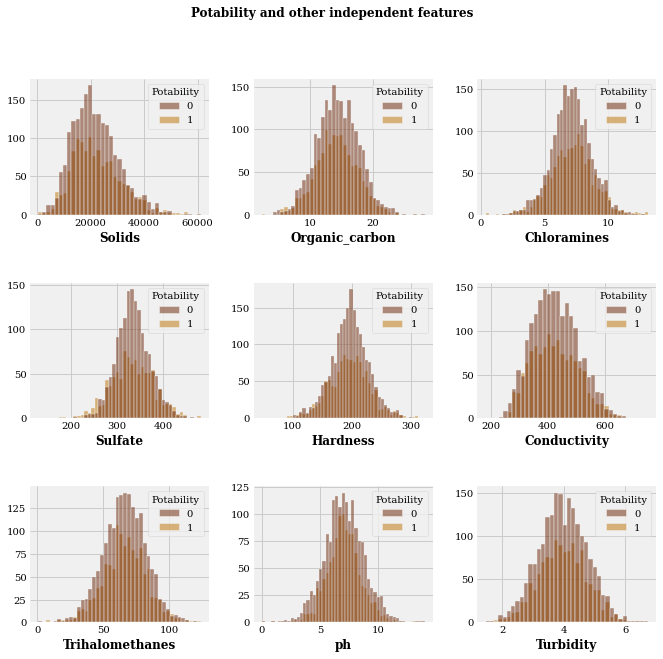

In [23]:
histall(df,col,"Potability",h=10)
plt.suptitle('Potability and other independent features',fontweight='bold')
plt.show()

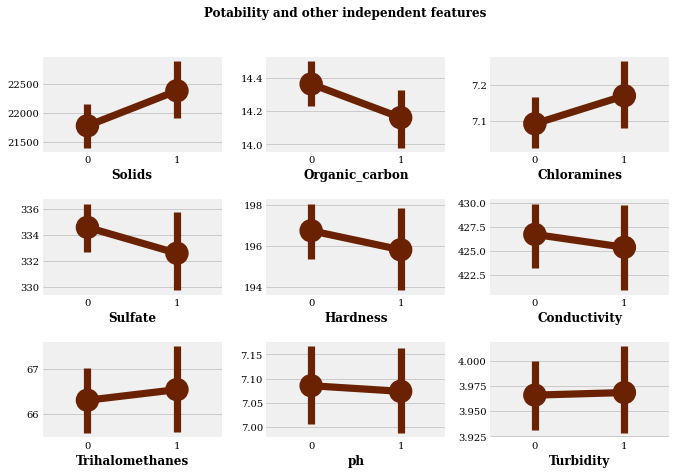

In [24]:
pointall(df,col,"Potability",h=7)
plt.suptitle('Potability and other independent features',fontweight='bold')
plt.show()

- Turibidity seems not to be a good predictor
- Water with is usable for human consumptions are more likely to have:
    + higher solids: with an average value of about 22400
    + lower organic carbon: around 14.2
    + higher chloramines
    + lower sulfate
    + lower hardness: around 196
    + lowr conductivity: about 425
    + higher trihalomethanes
    + slightly lower ph

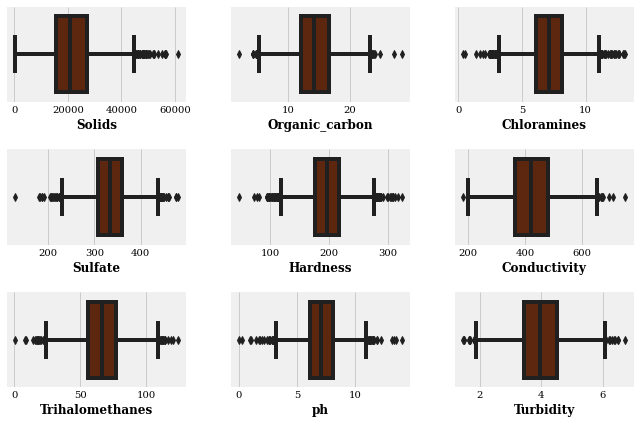

In [26]:
boxall(df,col,h=7)

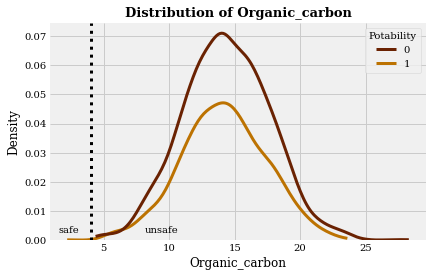

In [25]:
kdesmall("Organic_carbon")
plt.axvline(x=4,lw=3,ls=':',color='black')
plt.figtext(0.1, 0.15, 'safe')
plt.figtext(0.3, 0.15, 'unsafe')
despine()

>Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

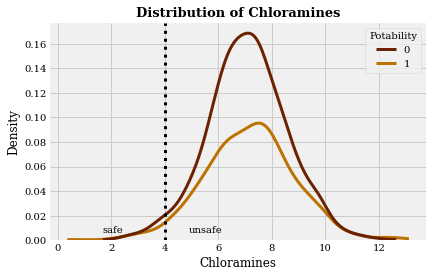

In [27]:
kdesmall("Chloramines")
plt.axvline(x=4,lw=3,ls=':',color='black')
plt.figtext(0.2, 0.15, 'safe')
plt.figtext(0.4, 0.15, 'unsafe')
despine()

>Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. **Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water**

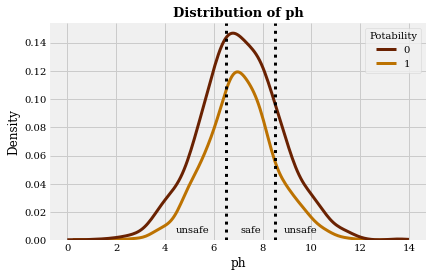

In [28]:
kdesmall("ph")
plt.axvline(x=6.5,lw=3,ls=':',color='black')
plt.axvline(x=8.5,lw=3,ls=':',color='black')
plt.figtext(0.52, 0.15, 'safe')
plt.figtext(0.37, 0.15, 'unsafe')
plt.figtext(0.62, 0.15, 'unsafe')

despine()

>PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. **WHO has recommended maximum permissible limit of pH from 6.5 to 8.5**. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

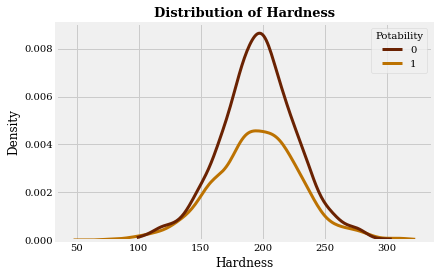

In [29]:
kdesmall("Hardness")

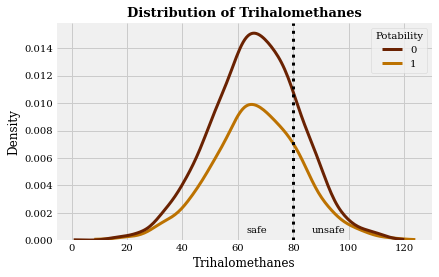

In [30]:
kdesmall("Trihalomethanes")
plt.axvline(x=80,lw=3,ls=':',color='black')
plt.figtext(0.52, 0.15, 'safe')
plt.figtext(0.67, 0.15, 'unsafe')
despine()

>THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. **THM levels up to 80 ppm is considered safe in drinking water**

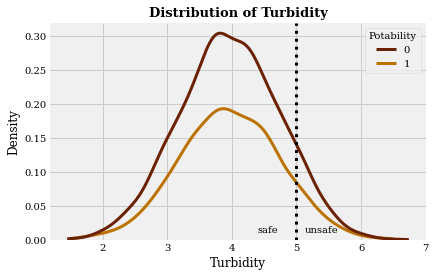

In [31]:
kdesmall("Turbidity")
plt.axvline(x=5,lw=3,ls=':',color='black')
plt.figtext(0.56, 0.15, 'safe')
plt.figtext(0.67, 0.15, 'unsafe')

despine()

>The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

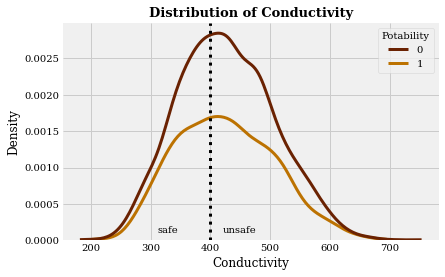

In [32]:
kdesmall("Conductivity")
plt.axvline(x=400,lw=3,ls=':',color='black')
plt.figtext(0.3, 0.15, 'safe')
plt.figtext(0.45, 0.15, 'unsafe')

despine()

>Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, **EC value should not exceeded 400 μS/cm**

### 2.1.4 Conclusion
- A large propotion of our observations are at unsafe levels

## 2.2 Multivariate analysis

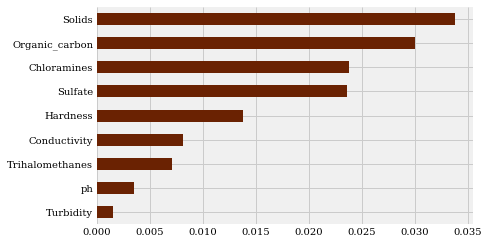

In [33]:
df.corr().Potability.abs().sort_values(ascending=False)[1:][::-1].plot(kind='barh')
despine()

- The most important features (in order) probably are: solids, organic carbon, chloramines, and sulfate

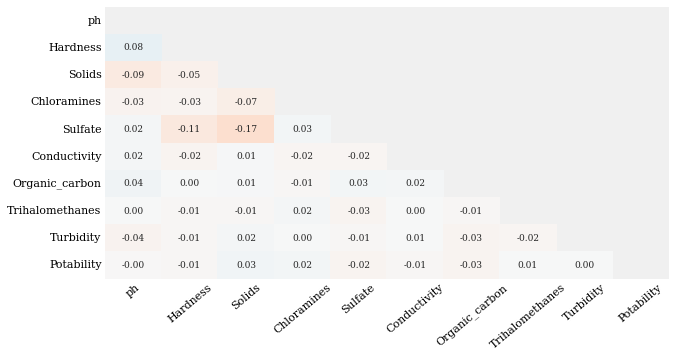

In [34]:
mask = np.triu(np.ones_like(df.corr()))
f=plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),cmap='RdBu',vmax=1,vmin=-1,mask=mask,annot=True,fmt='.2f',annot_kws={"size":9},cbar=False)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11,rotation=40)
plt.show()

- All of our features are weakly correlated

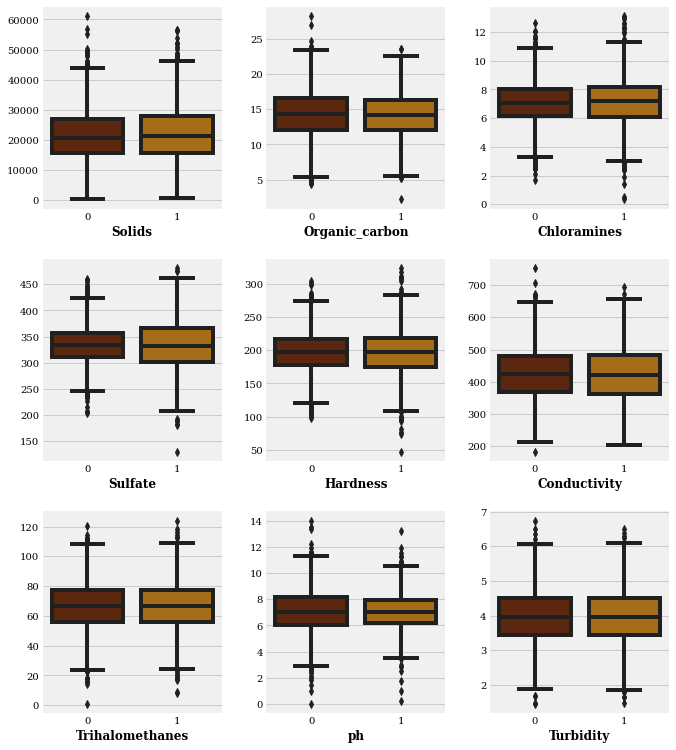

In [35]:
boxall(df,col,h=13,target="Potability",hspace=.25)

Let's form our hypothesis
    
    H0: mean values for both groups are the same
    H1: mean values for both groups are significantly different
    
    Alpha (significance level): 10%

In [36]:
from scipy.stats import ttest_ind
def checking(x):
    stat,p=ttest_ind(df[df.Potability==0].dropna(subset=[x])[x],df[df.Potability==1].dropna(subset=[x])[x])
    return p

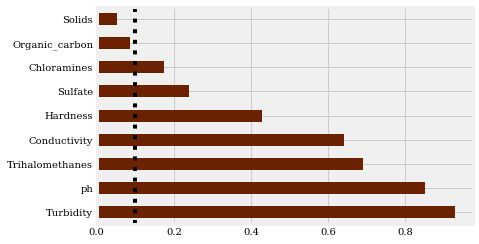

Turbidity          0.927939
ph                 0.851189
Trihalomethanes    0.690818
Conductivity       0.641885
Hardness           0.428542
Sulfate            0.239097
Chloramines        0.173610
Organic_carbon     0.085997
Solids             0.053464
dtype: float64

In [37]:
pd.Series({i:checking(i) for i in col}).sort_values(ascending=False).plot(kind='barh')
plt.axvline(x=.1,c='black',ls=':')
plt.show()

pd.Series({i:checking(i) for i in col}).sort_values(ascending=False)

- So solids and organic carbon features have significant differences on our target variable
- We also notice that ph and turbidity features seem not to be good predictors

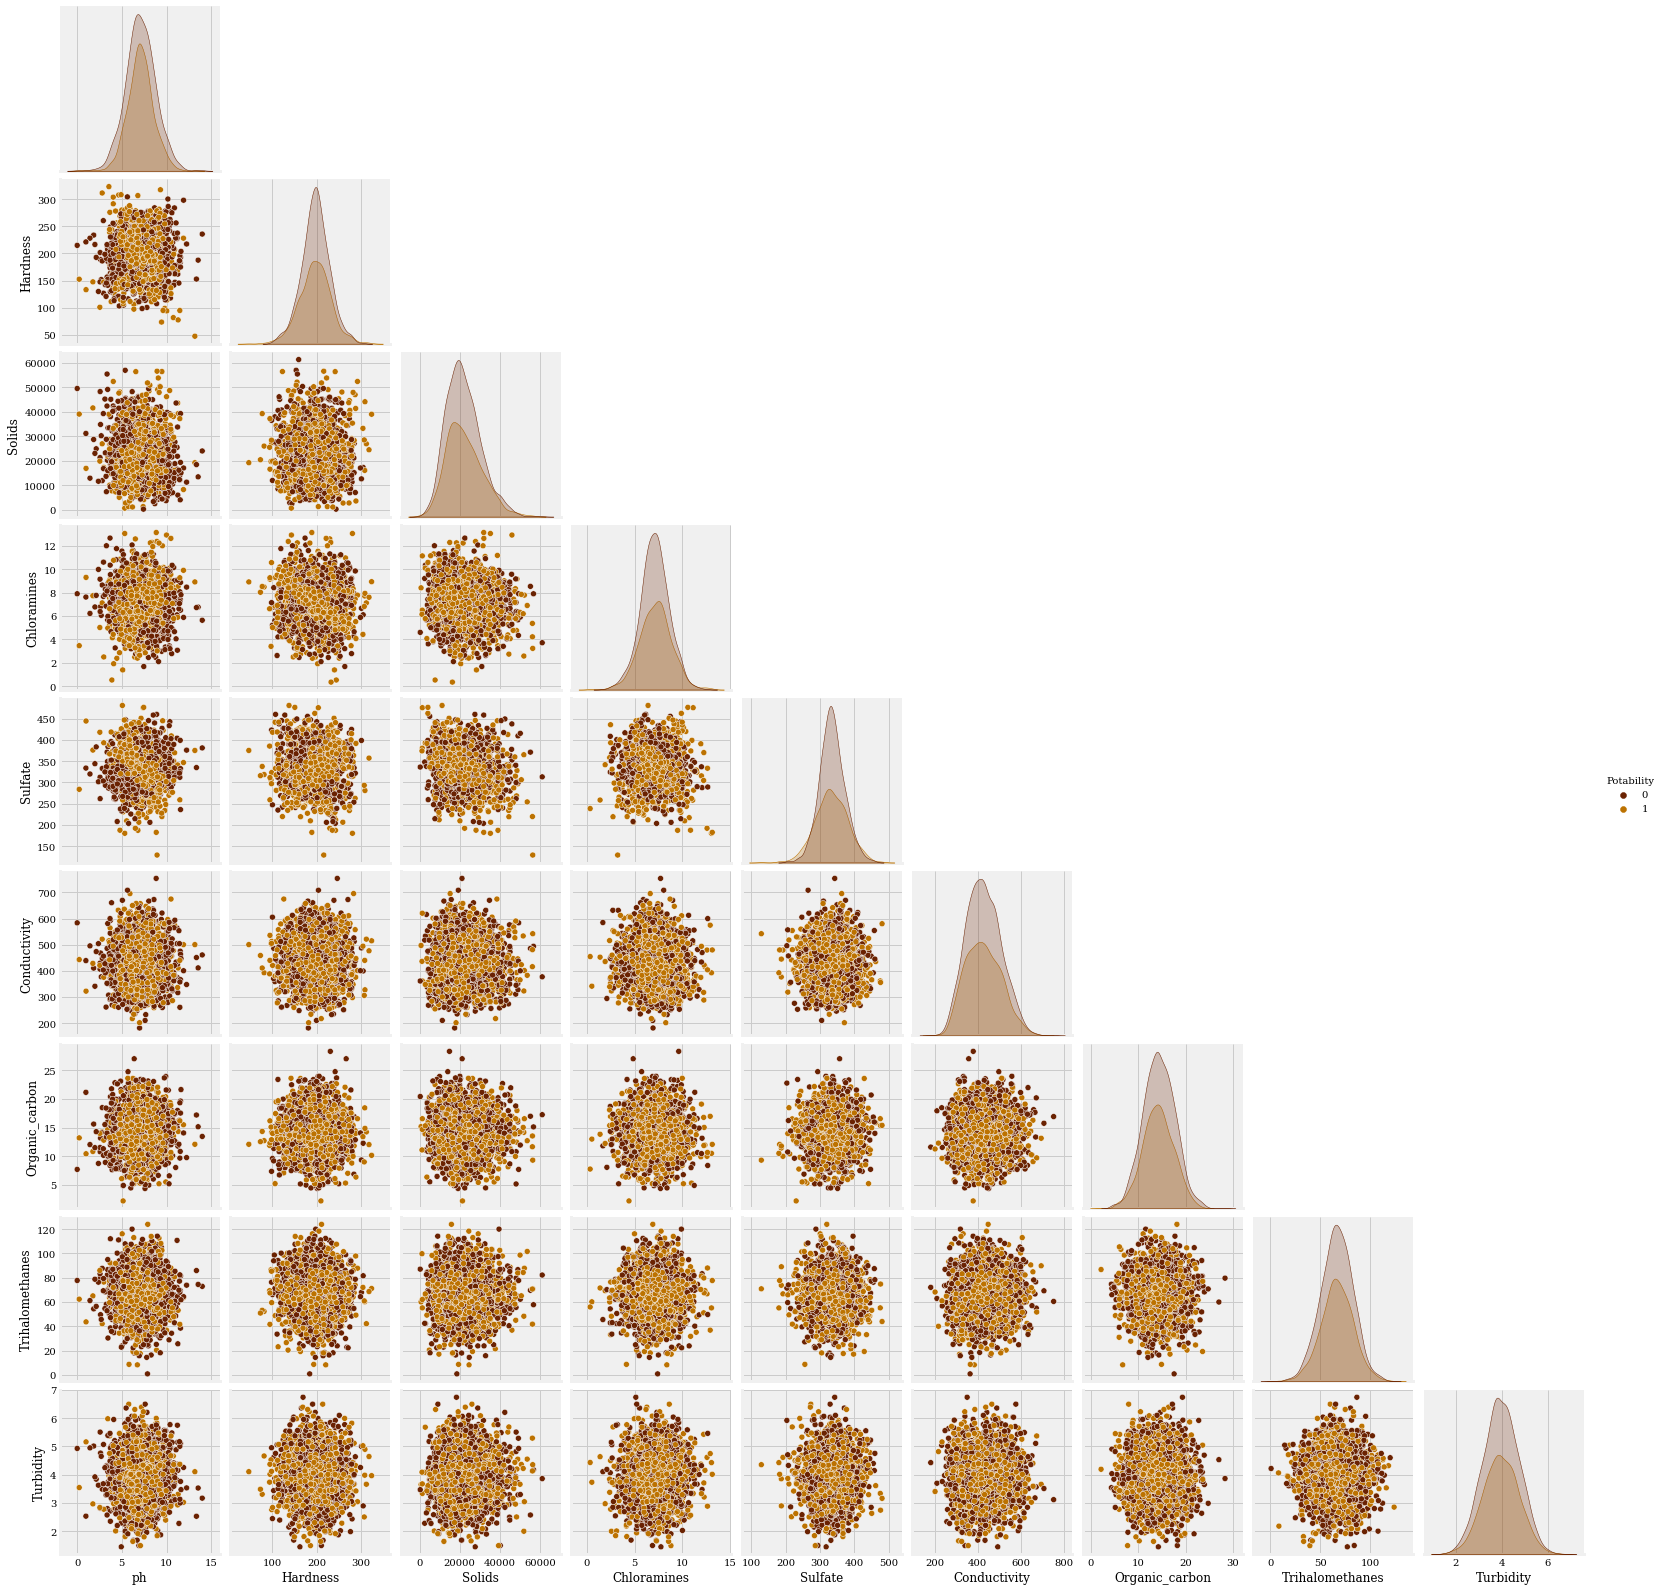

In [38]:
sns.pairplot(df,hue="Potability",corner=True)

- There is no clear linear trends because our variables are weakly correlated (see the correlation matrix), so linear models may not work on our dataset

# 3. Data preprocessing

## 3.1 Filling in missing data

In [39]:
df.isnull().sum().sort_values(ascending=False)

Sulfate            781
ph                 491
Trihalomethanes    162
Potability           0
Turbidity            0
Organic_carbon       0
Conductivity         0
Chloramines          0
Solids               0
Hardness             0
dtype: int64

In [40]:
for i in ["Sulfate","ph","Trihalomethanes"]:
    df[i].fillna(df[i].median(),inplace=True)

In [41]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## 3.2 Handling outliers

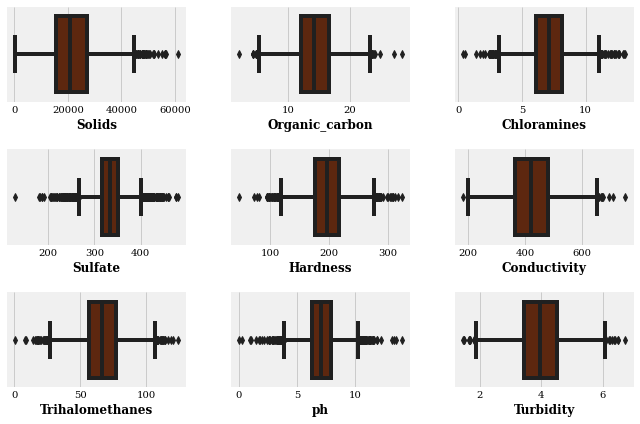

In [42]:
boxall(df,col,h=7)

In [43]:
def outliers(x,fence=1.5):
    q1,q3=np.percentile(df[x],25), np.percentile(df[x],75)
    iqr=q3-q1
    print(f"{x}: {len(df[(df[x]<q1-fence*iqr)|(df[x]>q3+1.5*iqr)])} outliers")
    return df[(df[x]<q1-fence*iqr)|(df[x]>q3+1.5*iqr)].index.tolist()

In [44]:
outind=[]
for i in ["Solids","Organic_carbon"]:
    outind.extend(outliers(i))
outind=list(set(outind))
print(f"\nWe are going to drop {len(outind)} outliers")

Solids: 47 outliers
Organic_carbon: 25 outliers

We are going to drop 71 outliers


In [45]:
print(df.shape)
df.drop(index=outind,inplace=True)
df.shape

(3276, 10)


(3205, 10)

## 3.3 Feature scaling

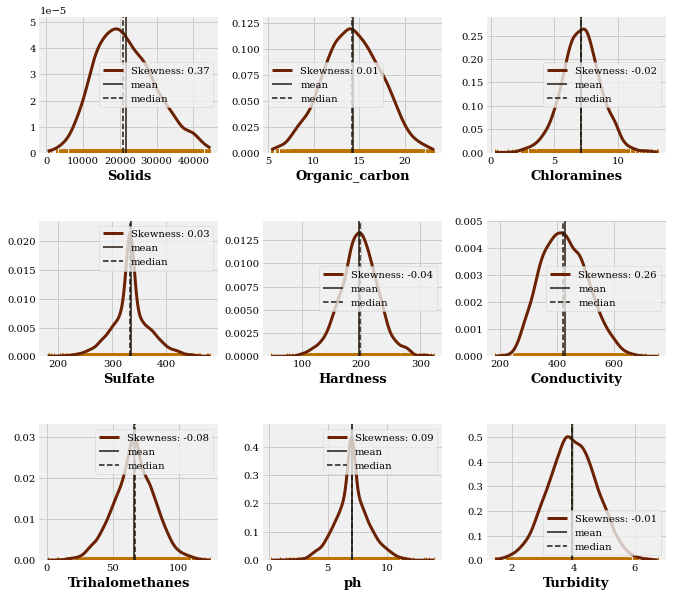

In [46]:
# before scaling
kdeall(df,col,h=10,xlabelsize=13)
df2=df.copy() # let's make a copy of our dataset before scaling

In [47]:
from sklearn.preprocessing import StandardScaler
scl=StandardScaler()
df[col]=scl.fit_transform(df[col])
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-0.029748,0.260959,-0.103710,0.110915,0.970290,1.707812,-1.217067,1.306824,-1.287621,0
1,-2.308350,-2.051835,-0.366906,-0.311823,-0.023162,2.060903,0.279053,-0.634482,0.682307,0
2,0.699238,0.853835,-0.211092,1.366907,-0.023162,-0.092471,0.805358,0.004414,-1.168724,0
3,0.848581,0.551575,0.045725,0.593510,0.644296,-0.776242,1.294032,2.152102,0.846451,0
4,1.380690,-0.468082,-0.446193,-0.368177,-0.666101,-0.342003,-0.849757,-2.174964,0.137037,0
...,...,...,...,...,...,...,...,...,...,...
3270,-0.693384,-0.297765,0.547498,0.395299,0.330760,-0.126070,-0.691008,-0.375477,-0.382330,1
3272,0.500060,-0.086484,-0.525250,0.594800,-0.023162,-0.415660,1.751168,0.017228,-1.498887,1
3273,1.605270,-0.631698,1.401995,0.142715,-0.023162,0.073574,-1.011583,0.221281,-0.857458,1
3274,-1.340358,1.048975,-1.176271,-0.522814,-0.023162,-0.286744,-0.971103,0.705173,0.948807,1


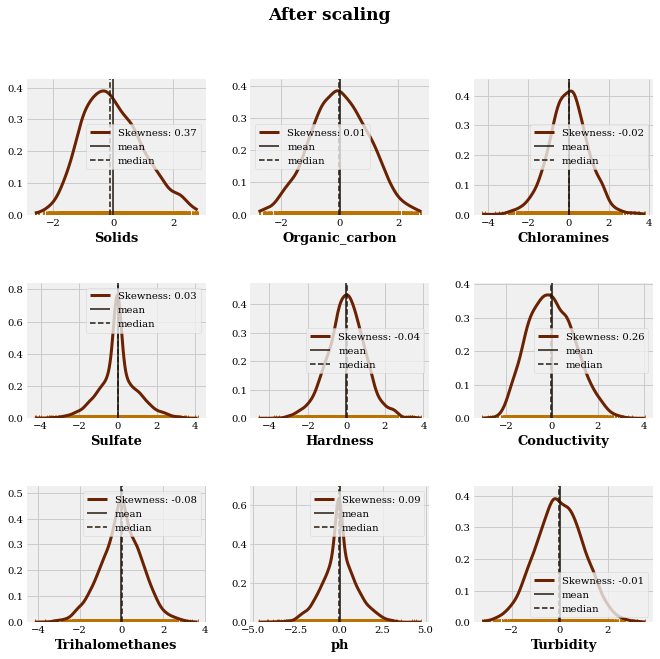

In [48]:
# after scaling
kdeall(df,col,h=10,xlabelsize=13)
plt.suptitle('After scaling',fontsize=17,fontweight='bold')
plt.show()

## 3.4 Feature selection

### 3.4.1 Using P-value

In [49]:
import statsmodels.api as sm
def select_by_pvalue(target,df,fence=.05,w=7,h=5,textw=.5,texth=.2):
    mod=sm.OLS(df[target],df.drop(target,axis=1))
    fii=mod.fit()
    sub=fii.summary2().tables[1]["P>|t|"].sort_values()
    sub.plot(kind='barh',figsize=(w,h))
    pvalue_set=sub[sub<=fence].index.tolist()
    plt.axvline(x=fence,c='black')
    plt.figtext(textw, texth, 'dropped',fontsize=15, fontweight='bold')
    return pvalue_set

[]

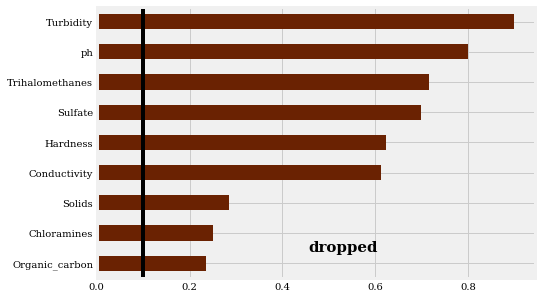

In [50]:
select_by_pvalue("Potability",df,fence=.1)

### 3.4.2 By our EDA

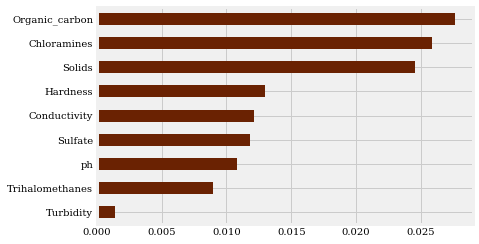

In [51]:
df.corr().Potability.abs().sort_values(ascending=False)[1:][::-1].plot(kind='barh')

- All features, except for turbidity

In [52]:
subset=df.drop(columns=['Turbidity','ph','Potability']).columns.tolist()
subset

['Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes']

## 3.4.2 Dimensionality reduction via PCA

In [53]:
from sklearn.decomposition import PCA
def reduct_pca(X,w=8,h=3):
    pca=PCA(n_components=X.shape[1],random_state=0)
    Xpca=pca.fit_transform(X)
    f=plt.figure(figsize=(w,h))
    plt.bar(range(1,X.shape[1]+1),pca.explained_variance_ratio_,label='individual explained variance')
    plt.step(range(1,X.shape[1]+1), np.cumsum(pca.explained_variance_ratio_),where='mid',label='cumulative explained variance')
    plt.xticks(range(1,X.shape[1]+1))
    plt.xlabel('# of principal components')
    plt.ylabel('explained variance ratio',fontsize=13)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12,loc='best')
    despine()
    return Xpca

array([[-0.77127318,  0.18855364,  0.13405659, ..., -1.19196667,
        -0.47074229,  1.14052209],
       [ 1.0096927 ,  2.31642938,  1.89001073, ..., -0.95893717,
        -1.30299617, -1.20951021],
       [-1.02658392, -0.80058958, -0.37347023, ..., -0.51062789,
         0.12018271,  0.46216164],
       ...,
       [ 0.27297267, -0.36069129,  0.05640583, ..., -0.5748448 ,
         2.12435989,  0.79779588],
       [ 0.02986049,  0.24605643, -1.37773926, ...,  0.54239443,
        -1.7312324 , -0.25126468],
       [-1.16015314, -0.57342443, -0.53330571, ..., -0.02840814,
         0.2587111 , -0.32001908]])

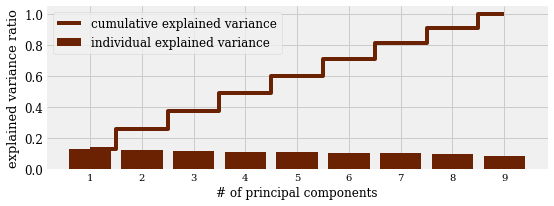

In [54]:
reduct_pca(df.drop(columns="Potability"))

- Approximate 60% of the variance was explained by the top 5 principal components
- We've noticed that our features have weak correlation and there are no obvious linear trends between features which might tell us a better story about our target variable

# 4. Modeling

In [55]:
X=df.iloc[:,:-1]
y=df.Potability
X.shape,y.shape

((3205, 9), (3205,))

## 4.1 Our baseline models

In [56]:
from sklearn.model_selection import StratifiedKFold
def check(clf,X,y=y,n_splits=10):
    kf=StratifiedKFold(n_splits=n_splits,random_state=0,shuffle=True)
    k_tracc,k_teacc=[],[]
    for (tr,te) in kf.split(X,y):
        clf.fit(X.iloc[tr],y.iloc[tr])
        k_tracc.append(clf.score(X.iloc[tr],y.iloc[tr]))
        k_teacc.append(clf.score(X.iloc[te],y.iloc[te]))
    print(f"Train score: {np.mean(k_tracc)}")
    print(f"Test score: {np.mean(k_teacc)}")
    return clf

In [57]:
def selectmoran(modellst,X,y=y,n_splits=10,random_state=0):
    kf=StratifiedKFold(n_splits=n_splits,random_state=random_state,shuffle=True)
    namelst,imp,tr_acc,te_acc=[],[],[],[]
    for clf in modellst:
        namelst.append(type(clf).__name__)
        k_tracc, k_teacc, k_f1, k_imp=[],[],[],[]
        for (tr,te) in kf.split(X,y): # train, test index
            clf.fit(X.iloc[tr],y.iloc[tr])
            k_tracc.append(clf.score(X.iloc[tr],y.iloc[tr]))
            k_teacc.append(clf.score(X.iloc[te],y.iloc[te]))
            if hasattr(clf,"feature_importances_"): k_imp.append(clf.feature_importances_)
        tr_acc.append(np.mean(k_tracc))
        te_acc.append(np.mean(k_teacc))
        if len(k_imp)==0: imp.append(False)
        else: imp.append(np.mean(k_imp,axis=0))
    score=pd.DataFrame({'Model':namelst,'Train_accuracy':tr_acc,'Test_accuracy':te_acc}).sort_values('Test_accuracy',ascending=False)
    return score,imp

In [58]:
def plotscoring(score,title,w=7,h=5,alpha=.97,axvline=.8,yticksize=12):
    f,ax=plt.subplots(figsize=(w,h))
    print(f"Mean accuracy for all models: {np.mean(score.Test_accuracy)}\n")
    print(score)
    sns.barplot(x=score.Test_accuracy,y=score.Model,alpha=alpha,color='#bc7201')
    sns.barplot(x=-score.Train_accuracy,y=score.Model,alpha=alpha,color='#6a2202')
    ax.set_xlim(-1,1)
    plt.axvline(x=0,color='black')
    plt.xlabel('Train/ Test accuracy')
    plt.ylabel('')
    plt.title(f"Model score for {title}",fontweight='bold')
    plt.axvline(x=axvline,ls=':')
    plt.yticks(fontsize=yticksize)
    despine()

In [59]:
from sklearn.model_selection import GridSearchCV
def grid(clf,params,X,y=y,cv=5):
    grid=GridSearchCV(clf,params,cv=cv)
    grid.fit(X,y)
    print(f"Best score: {grid.best_score_}")
    print(f"Best params: {grid.best_params_}")
    return grid.best_estimator_

In [60]:
def plotting_importances(score,imp,X,w=8,h=3,rotation=90,xsize=10):
    for (a,b) in zip(score.Model,imp):
        if b is not False:
            ind=np.argsort(b)[::-1]
            cols=X.columns
            plt.figure(figsize=(w,h))
            plt.title(f"Feature importances via {a}",fontweight='bold',fontsize=13)
            plt.bar(range(X.shape[1]),b[ind])
            plt.xticks(range(X.shape[1]),cols[ind],rotation=rotation,fontsize=xsize)
            plt.xlim([-1,X.shape[1]])
            plt.tight_layout()

In [63]:
! pip install CatBoost

     |████████████████████████████████| 76.1 MB 1.2 MB/s 


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.svm import SVC,LinearSVC

modellst=[LogisticRegression(solver='liblinear'), 
          RandomForestClassifier(), GradientBoostingClassifier(),
          AdaBoostClassifier(), BaggingClassifier(), CatBoostClassifier(), XGBClassifier(),
          GaussianNB(), LGBMClassifier(), SVC()]

### 4.1.1 Initial performance on our full set

In [65]:
scorefull,impfull=selectmoran(modellst,X,y)

A saída de streaming foi truncada nas últimas 5000 linhas.
4:	learn: 0.6847417	total: 17.9ms	remaining: 3.56s
5:	learn: 0.6834253	total: 21.3ms	remaining: 3.53s
6:	learn: 0.6820372	total: 24.8ms	remaining: 3.52s
7:	learn: 0.6808075	total: 28.4ms	remaining: 3.52s
8:	learn: 0.6794298	total: 31.7ms	remaining: 3.49s
9:	learn: 0.6776780	total: 35.1ms	remaining: 3.47s
10:	learn: 0.6763782	total: 38.4ms	remaining: 3.45s
11:	learn: 0.6743186	total: 41.8ms	remaining: 3.44s
12:	learn: 0.6732016	total: 45.1ms	remaining: 3.42s
13:	learn: 0.6722250	total: 48.5ms	remaining: 3.42s
14:	learn: 0.6707867	total: 52.1ms	remaining: 3.42s
15:	learn: 0.6693453	total: 55.5ms	remaining: 3.41s
16:	learn: 0.6673929	total: 59.1ms	remaining: 3.42s
17:	learn: 0.6656100	total: 62.8ms	remaining: 3.42s
18:	learn: 0.6639644	total: 66.5ms	remaining: 3.43s
19:	learn: 0.6625253	total: 70.4ms	remaining: 3.45s
20:	learn: 0.6610283	total: 79.1ms	remaining: 3.69s
21:	learn: 0.6594555	total: 92.6ms	remaining: 4.12s
22:	learn: 

Mean accuracy for all models: 0.6468686721183801

                        Model  Train_accuracy  Test_accuracy
9                         SVC        0.730109       0.677070
5          CatBoostClassifier        0.880430       0.676137
1      RandomForestClassifier        1.000000       0.665528
8              LGBMClassifier        0.956145       0.656164
4           BaggingClassifier        0.980378       0.654317
2  GradientBoostingClassifier        0.738256       0.650855
6               XGBClassifier        0.723973       0.649917
7                  GaussianNB        0.625620       0.619660
0          LogisticRegression        0.610470       0.609984
3          AdaBoostClassifier        0.656058       0.609055


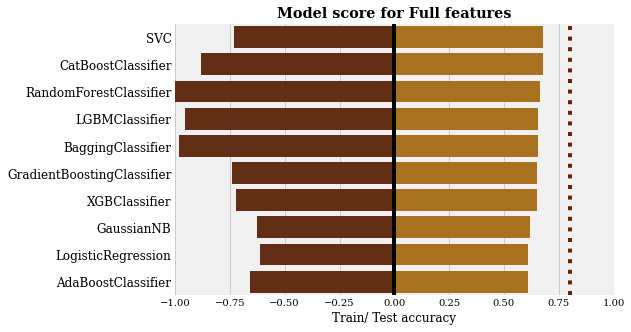

In [66]:
plotscoring(scorefull,'Full features')

### 4.1.2 Performing on our subset

In [67]:
subset

['Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes']

In [68]:
score_subset,imp_subset=selectmoran(modellst,X[subset])

A saída de streaming foi truncada nas últimas 5000 linhas.
4:	learn: 0.6859747	total: 16.5ms	remaining: 3.29s
5:	learn: 0.6850237	total: 19.7ms	remaining: 3.27s
6:	learn: 0.6835885	total: 23ms	remaining: 3.26s
7:	learn: 0.6823878	total: 26.2ms	remaining: 3.25s
8:	learn: 0.6813267	total: 29.2ms	remaining: 3.21s
9:	learn: 0.6801379	total: 32.4ms	remaining: 3.21s
10:	learn: 0.6789600	total: 35.5ms	remaining: 3.19s
11:	learn: 0.6778302	total: 38.7ms	remaining: 3.19s
12:	learn: 0.6768442	total: 41.8ms	remaining: 3.18s
13:	learn: 0.6757498	total: 45.1ms	remaining: 3.17s
14:	learn: 0.6746584	total: 48.2ms	remaining: 3.16s
15:	learn: 0.6735618	total: 51.5ms	remaining: 3.17s
16:	learn: 0.6728087	total: 55ms	remaining: 3.18s
17:	learn: 0.6718298	total: 58.5ms	remaining: 3.19s
18:	learn: 0.6708435	total: 61.6ms	remaining: 3.18s
19:	learn: 0.6699650	total: 64.7ms	remaining: 3.17s
20:	learn: 0.6688593	total: 67.7ms	remaining: 3.15s
21:	learn: 0.6678730	total: 70.7ms	remaining: 3.14s
22:	learn: 0.66

Mean accuracy for all models: 0.6230291082554517

                        Model  Train_accuracy  Test_accuracy
9                         SVC        0.684209       0.644306
5          CatBoostClassifier        0.838100       0.633072
1      RandomForestClassifier        1.000000       0.630899
6               XGBClassifier        0.700399       0.630887
2  GradientBoostingClassifier        0.716589       0.627770
4           BaggingClassifier        0.979164       0.618405
7                  GaussianNB        0.622846       0.615918
3          AdaBoostClassifier        0.651795       0.611561
0          LogisticRegression        0.610470       0.609984
8              LGBMClassifier        0.924944       0.607489


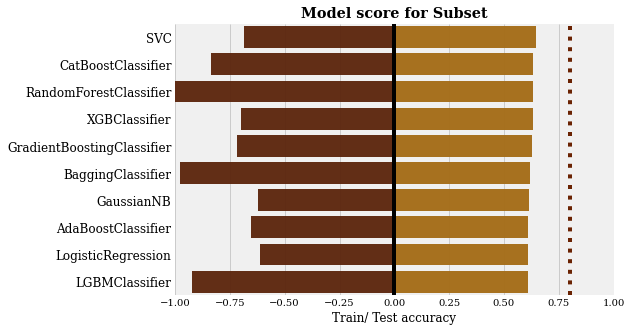

In [69]:
plotscoring(score_subset,'Subset')

In [70]:
def plot_meanscore(meanscore_set):
    print(meanscore_set)
    f=plt.figure(figsize=(8,3))
    meanscore_set.Test_accuracy[::-1].plot(kind='barh',color='#0f1a26',alpha=.95)
    (-1*meanscore_set.Train_accuracy[::-1]).plot(kind='barh',alpha=.95)
    plt.axvline(x=0,c='black')
    despine()

In [71]:
meanscore=pd.DataFrame({'Test_accuracy':[np.mean(i.Test_accuracy) for i in [scorefull,score_subset]],
             'Train_accuracy':[np.mean(i.Train_accuracy) for i in [scorefull,score_subset]]},
             index=['Fullset','Subset']).sort_values('Test_accuracy',ascending=False)

maxscore=pd.DataFrame({'Test_accuracy':[np.max(i.Test_accuracy) for i in [scorefull,score_subset]],
             'Train_accuracy':[np.max(i.Train_accuracy) for i in [scorefull,score_subset]]},
             index=['Fullset','Subset']).sort_values('Test_accuracy',ascending=False)

         Test_accuracy  Train_accuracy
Fullset       0.646869        0.790144
Subset        0.623029        0.772852


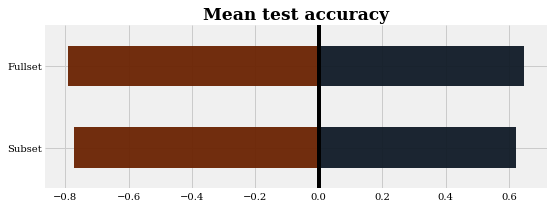

In [72]:
plot_meanscore(meanscore)
title('Mean test accuracy',fontsize=17)

         Test_accuracy  Train_accuracy
Fullset       0.677070             1.0
Subset        0.644306             1.0


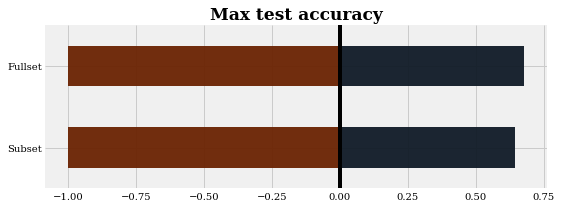

In [73]:
plot_meanscore(maxscore)
title('Max test accuracy',fontsize=17)

- Our fullset has better performance than subset

## 4.2 Hypertuning parameters

### 4.2.1 Hypertuning parameters on our fullset

Mean accuracy for all models: 0.6468686721183801

                        Model  Train_accuracy  Test_accuracy
9                         SVC        0.730109       0.677070
5          CatBoostClassifier        0.880430       0.676137
1      RandomForestClassifier        1.000000       0.665528
8              LGBMClassifier        0.956145       0.656164
4           BaggingClassifier        0.980378       0.654317
2  GradientBoostingClassifier        0.738256       0.650855
6               XGBClassifier        0.723973       0.649917
7                  GaussianNB        0.625620       0.619660
0          LogisticRegression        0.610470       0.609984
3          AdaBoostClassifier        0.656058       0.609055


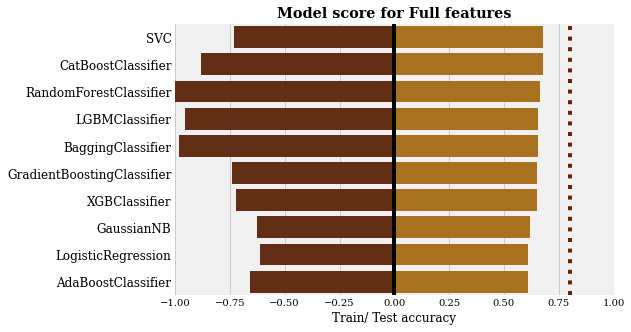

In [74]:
plotscoring(scorefull,'Full features')